In [1]:
import geopandas as gpd
from pyproj import Proj, transform
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
import contextily as ctx
import cartopy.crs as ccrs  
import cartopy.feature as cf
import contextily as ctx

In [2]:
shapefile = gpd.read_file("CMC_bldg_500mbuffer/CMC_bldg_500mbuffer.shp")

In [3]:
def floor_calc(floor_str):
    if len(floor_str)>1:
        return 1+int(floor_str[2:])
    else:
        return 1

shapefile['Number_of_floor']=shapefile['FR_N_Floor'].apply(floor_calc)
shapefile['bldgH']=(7.5/2)*shapefile['Number_of_floor']

In [4]:
shapefile.head()

,FR_MainUse,FR_Pre_Use,FR_N_Floor,FR_Name,FR_Remarks,FR_Ownersh,FR_Conditi,FR_Status,FR_Code,Area,geometry,Number_of_floor,bldgH
0,Under Construction,None,G,None,None,Private,Under Construction,None,P1,175.490,POLYGON Z ((373754.6493935751 767480.695876352...,1,3.75
1,Educational,School,G+2,Vivekananda Collage,National School,State,Good,Permanent,P2,564.856,POLYGON Z ((374071.0419834268 767639.090538884...,3,11.25
2,Educational,School,G+3,Vivekananda Collage,National School,State,Good,Permanent,P2,481.648,POLYGON Z ((373985.1314405794 767617.312719321...,4,15.00
3,Educational,School,G,Vivekananda Collage,National School,State,Good,Permanent,P1,300.544,POLYGON Z ((374042.3508641907 767623.312679832...,1,3.75
4,Educational,School,G+3,Vivekananda Collage,National School,State,Good,Permanent,P2,232.632,POLYGON Z ((374047.6179675139 767622.622361692...,4,15.00


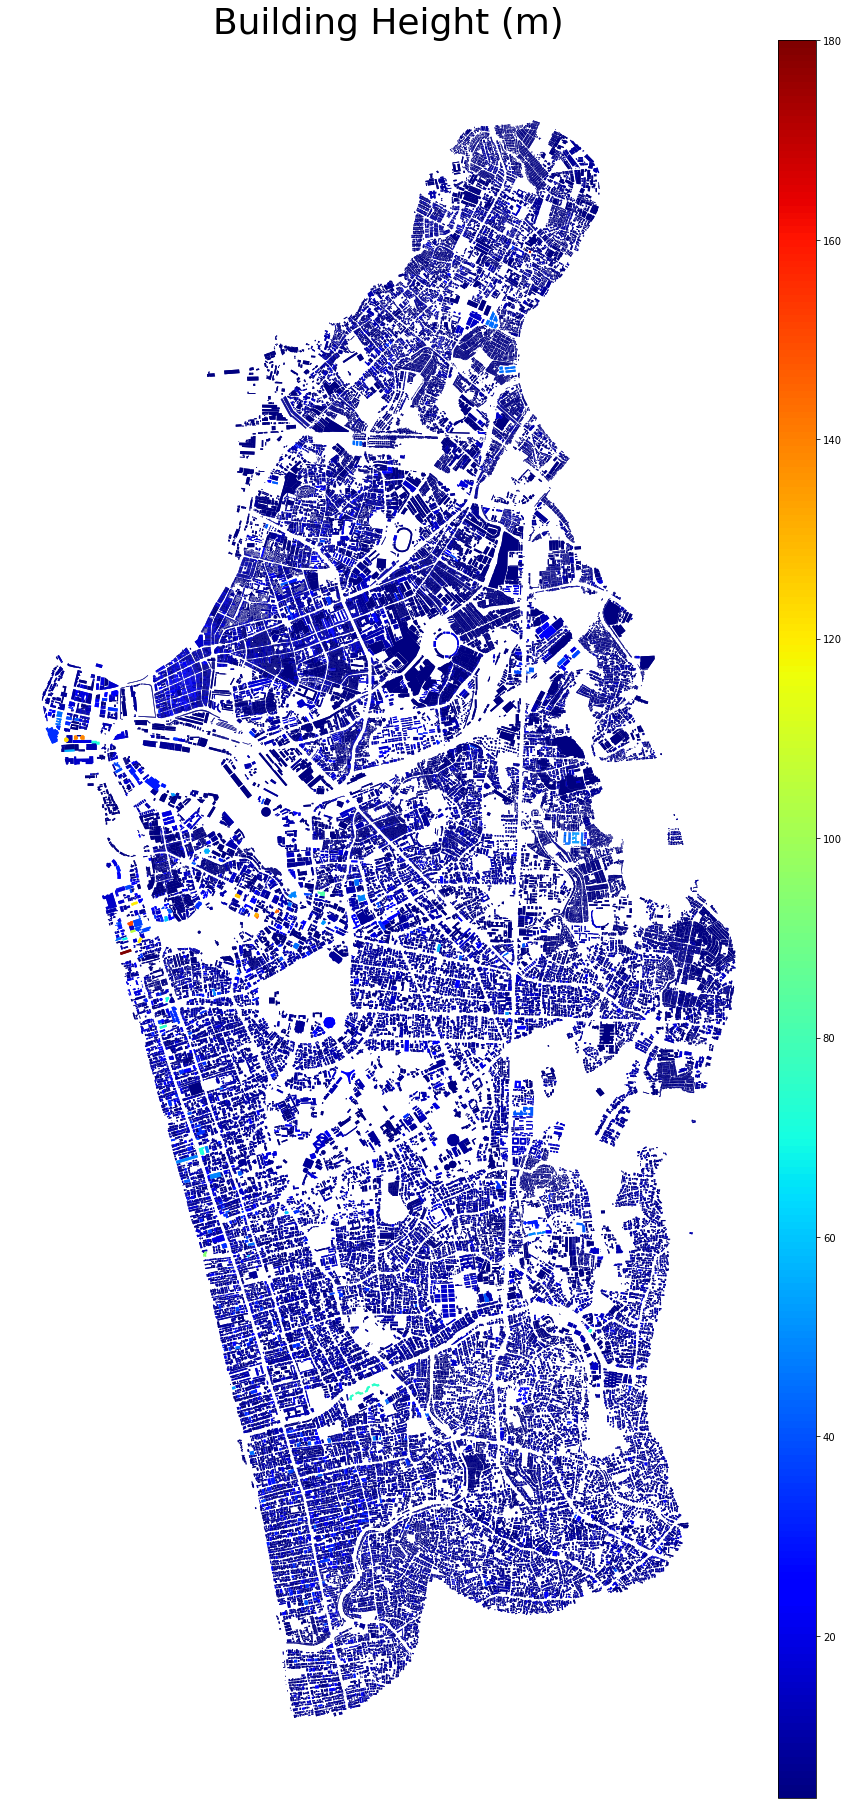

In [5]:
fig, ax = plt.subplots(1, 1,figsize=(25,25))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
# Z1=shapefile['bldgH']
# norm=colors.LogNorm(vmin=Z1.min(), vmax=Z1.max())
shapefile.plot('bldgH',cmap='jet',ax=ax,
               legend=True, cax=cax)
plt.tight_layout()
plt.rc('font', size=30)
ax.set_title('Building Height (m)')
ax.set_axis_off()
plt.savefig('Colombo_bldgH.png',dpi=300)

In [6]:
def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))
shapefile = shapefile.to_crs(epsg=3857)

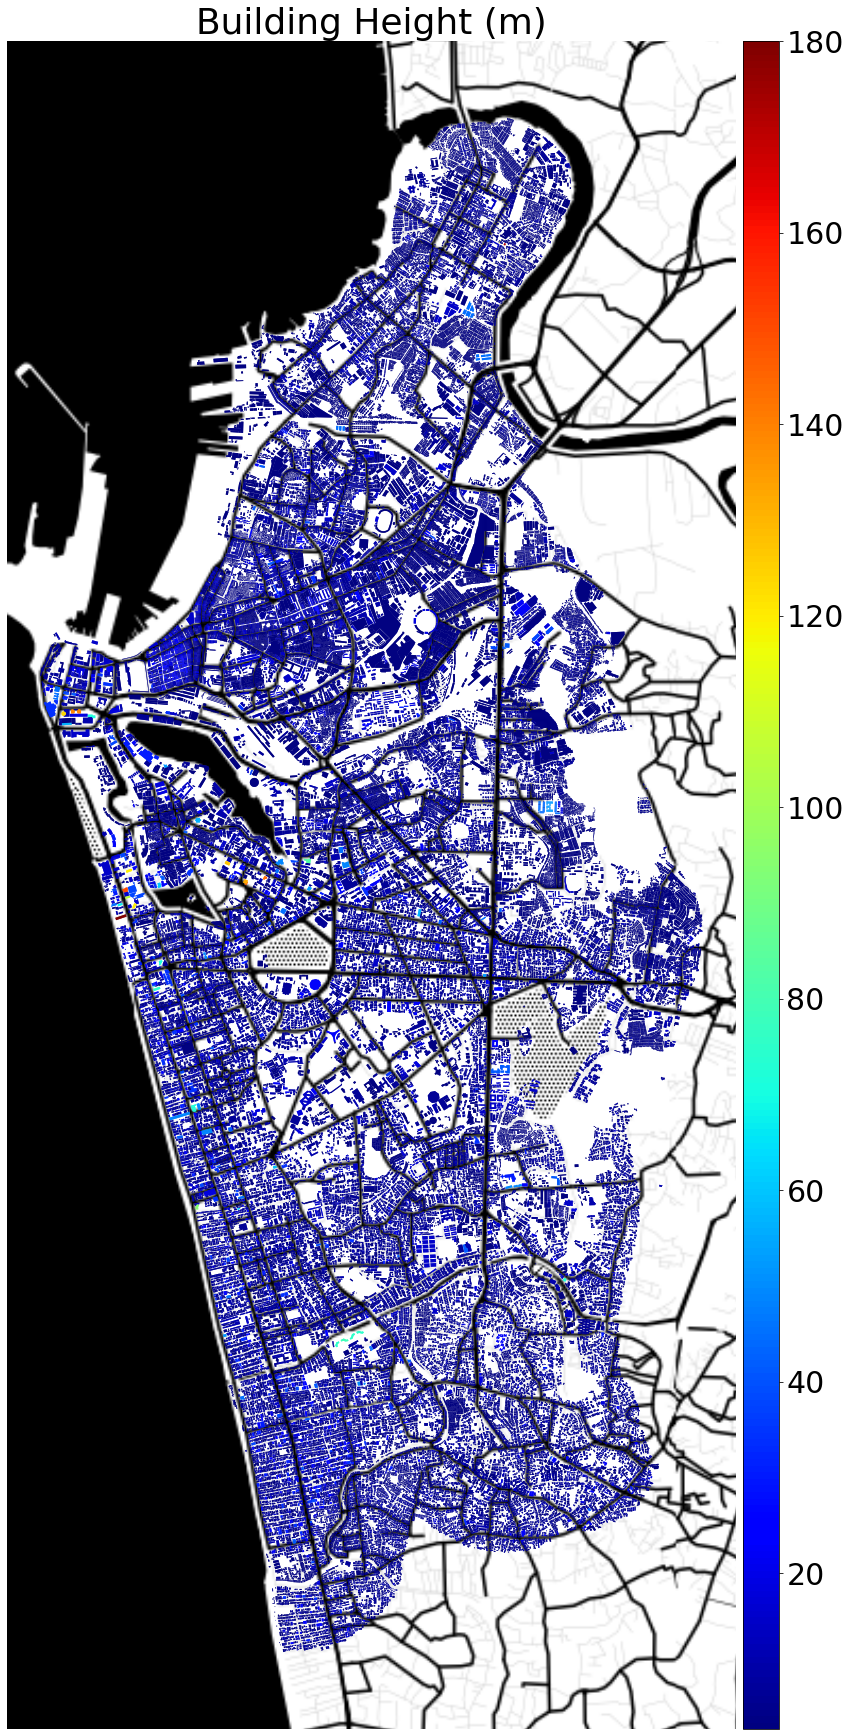

In [7]:
fig, ax = plt.subplots(1, 1,figsize=(25,25))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
#Z1=shapefile['bldgH']
#norm=colors.LogNorm(vmin=Z1.min(), vmax=Z1.max())
shapefile.plot('bldgH',alpha=0.9,cmap='jet',ax=ax,
               legend=True, cax=cax)
plt.tight_layout()
plt.rc('font', size=30)
ax.set_title('Building Height (m)')
ax.set_axis_off()
add_basemap(ax, zoom=13,url=ctx.sources.ST_TONER_BACKGROUND)
plt.savefig('Colombo_bldgH_basemap.png',dpi=200)